## Evaluating your model

We are now going to discover the impact of using the same model over different datasets (rather than different models over the same dataset) to calculate our evaluation metrics.

First, let's introduce some packages and code to calculate our evaluation metrics:

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae  
from math import sqrt
from sklearn.metrics import mean_squared_error as mse 

# The calculations we use for the evaluation calculations
from sklearn.metrics import mean_absolute_error as mae  
from math import sqrt
from sklearn.metrics import mean_squared_error as mse 

def calculate_evaluation_measures(x,y,a,b):
    y_hat = []
    for x_i in x: 
        y_hat.append(x_i*a+b)

    pe = []
    for j in range(0,len(y)):
        pe_j = (y[j]-y_hat[j])/y[j]*100
        pe.append(abs(pe_j))    
    mape = np.average(pe)

    print('Model MAE : ' + str(mae(y,y_hat)))
    print('Model RMSE : '+ str(sqrt(mse(y,y_hat))))
    print('Model MAPE : '+ str(mape))

Now, let's introduce the data we are going to be using:

## Dataset 1

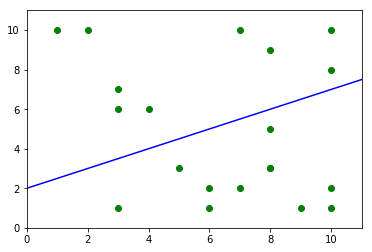

Model MAE : 3.6
Model RMSE : 4.018706259482023
Model MAPE : 151.79166666666669


In [2]:
# _o stands for 'original'
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

# Make a scatter plot and overlay with our equations
plt.scatter(x_o,y_o,c='green')

# Fix the a and b parameters
a=0.5
b=2

# Set the axes limits
plt.axis([0, 11, 0, 11])
x = np.array(range(0,12))
plt.plot(x,x*a+b,'b-')
plt.show()

calculate_evaluation_measures(x_o,y_o,a,b)

## Dataset 2

Let's try the same approach, but using different data, to calculate our evaluation metrics. Both the blue and red points are evaluated, each churning out different results:

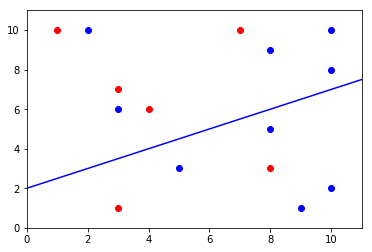

Evaluation 1: 
Model MAE : 3.7
Model RMSE : 4.189272013130682
Model MAPE : 101.66666666666666
Evaluation 2: 
Model MAE : 3.2777777777777777
Model RMSE : 3.840572873934304
Model MAPE : 117.5


In [3]:
# Try one:
x_1 = x_o[0:6]
np.append(x_1, x_o[15:])
y_1 = y_o[0:6]
np.append(y_1, y_o[15:])

x_2 = x_o[6:15]
y_2 = y_o[6:15]

plt.scatter(x_1,y_1,c='red')
plt.scatter(x_2,y_2,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

x_1 = x_o[0:5]
y_1 = y_o[0:5]

print('Evaluation 1: ')
calculate_evaluation_measures(x_1,y_1,a,b)
print('Evaluation 2: ')
calculate_evaluation_measures(x_2,y_2,a,b)

Notice how they are both still relatively similar. They are also similar to the full datasets. That is because they are picked relavitely randomly, and are both quite representative of the original dataset. The MAPE is lower for both, and the blue set has quite a low MAE/RMSE. 

## Dataset 3

Let's try another example:

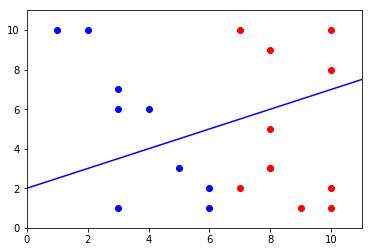

Evaluation 1: 
Model MAE : 3.5
Model RMSE : 3.834650630050338
Model MAPE : 174.16666666666669
Evaluation 2: 
Model MAE : 3.7222222222222223
Model RMSE : 4.232808366400098
Model MAPE : 124.44444444444444


In [4]:
# Try two:
x_1 = x_o[x_o>6]
y_1 = y_o[x_o>6]

x_2 = x_o[x_o<=6]
y_2 = y_o[x_o<=6]

plt.scatter(x_1,y_1,c='red')
plt.scatter(x_2,y_2,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

print('Evaluation 1: ')
calculate_evaluation_measures(x_1,y_1,a,b)
print('Evaluation 2: ')
calculate_evaluation_measures(x_2,y_2,a,b)

Again, the evaluation is quite in line with the original dataset's results. 

## Dataset 4

Let's try another one:

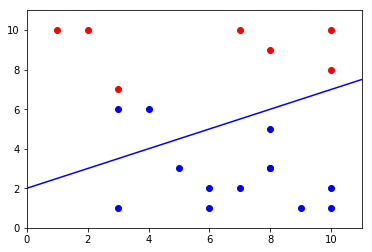

Evaluation 1: 
Model MAE : 4.214285714285714
Model RMSE : 4.732109164300539
Model MAPE : 45.11904761904761
Evaluation 2: 
Model MAE : 3.269230769230769
Model RMSE : 3.5760958514085632
Model MAPE : 209.23076923076923


In [5]:
# Try three:
x_1 = x_o[y_o>6]
y_1 = y_o[y_o>6]

x_2 = x_o[y_o<=6]
y_2 = y_o[y_o<=6]

plt.scatter(x_1,y_1,c='red')
plt.scatter(x_2,y_2,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

print('Evaluation 1: ')
calculate_evaluation_measures(x_1,y_1,a,b)
print('Evaluation 2: ')
calculate_evaluation_measures(x_2,y_2,a,b)

In this example, the error measures seem to go up quite significantly for the red in terms of MAE/RMSE, and go down for the blue. The MAPE sees the opposite effect. The metrics vary quite drastically. This shows that using different parts of the data tells you different things. We need to be careful to pay attention to this when we use a certain part for training a model, and another part for testing how it is performing.

## Your experimentation

Now it is up to you to experiment. Try to select two times two sets of datapoints (non-overlapping) that will give you a representative set of the whole dataset. Try to make both subsets of the original dataset as close to the performance metrics we saw at the beginning:

### Attempt 1

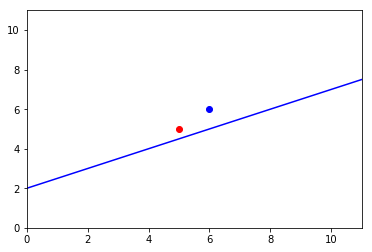

Model MAE : 0.5
Model RMSE : 0.5
Model MAPE : 10.0
Model MAE : 1.0
Model RMSE : 1.0
Model MAPE : 16.666666666666664


In [6]:
# Your first attempt:
x_a = [5]
y_a = [5]

x_b = [6]
y_b = [6]

plt.scatter(x_a,y_a,c='red')
plt.scatter(x_b,y_b,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

calculate_evaluation_measures(x_a,y_a,a,b)
calculate_evaluation_measures(x_b,y_b,a,b)

### Attempt 2

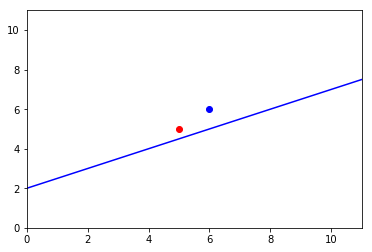

Model MAE : 0.5
Model RMSE : 0.5
Model MAPE : 10.0
Model MAE : 1.0
Model RMSE : 1.0
Model MAPE : 16.666666666666664


In [7]:
# Your second attempt:
x_a = [5]
y_a = [5]

x_b = [6]
y_b = [6]

plt.scatter(x_a,y_a,c='red')
plt.scatter(x_b,y_b,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

calculate_evaluation_measures(x_a,y_a,a,b)
calculate_evaluation_measures(x_b,y_b,a,b)